<a href="https://colab.research.google.com/github/ozadencsevda/insurance-cost-prediction/blob/main/insuranceCost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.describe()#sayısal sütunların özet istatistiklerini verir.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.isnull().any()
#bir sütunda eksik değer varsa True, eksik değer yoksa False olarak sonuç verir.

,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


In [8]:
data = pd.get_dummies(data, drop_first=True)
#veri setindeki kategorik sütunları (sınıflandırmalar, kategoriler, etiketler vb.)

#binary (ikili) değişkenler haline dönüştürür.

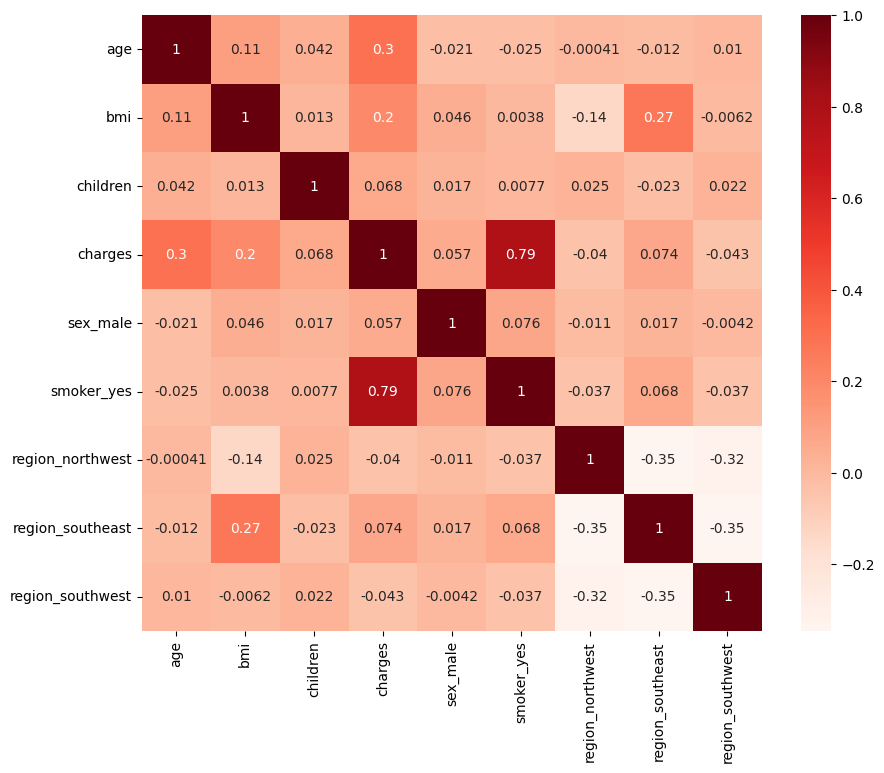

In [9]:
plt.figure(figsize=(10,8))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


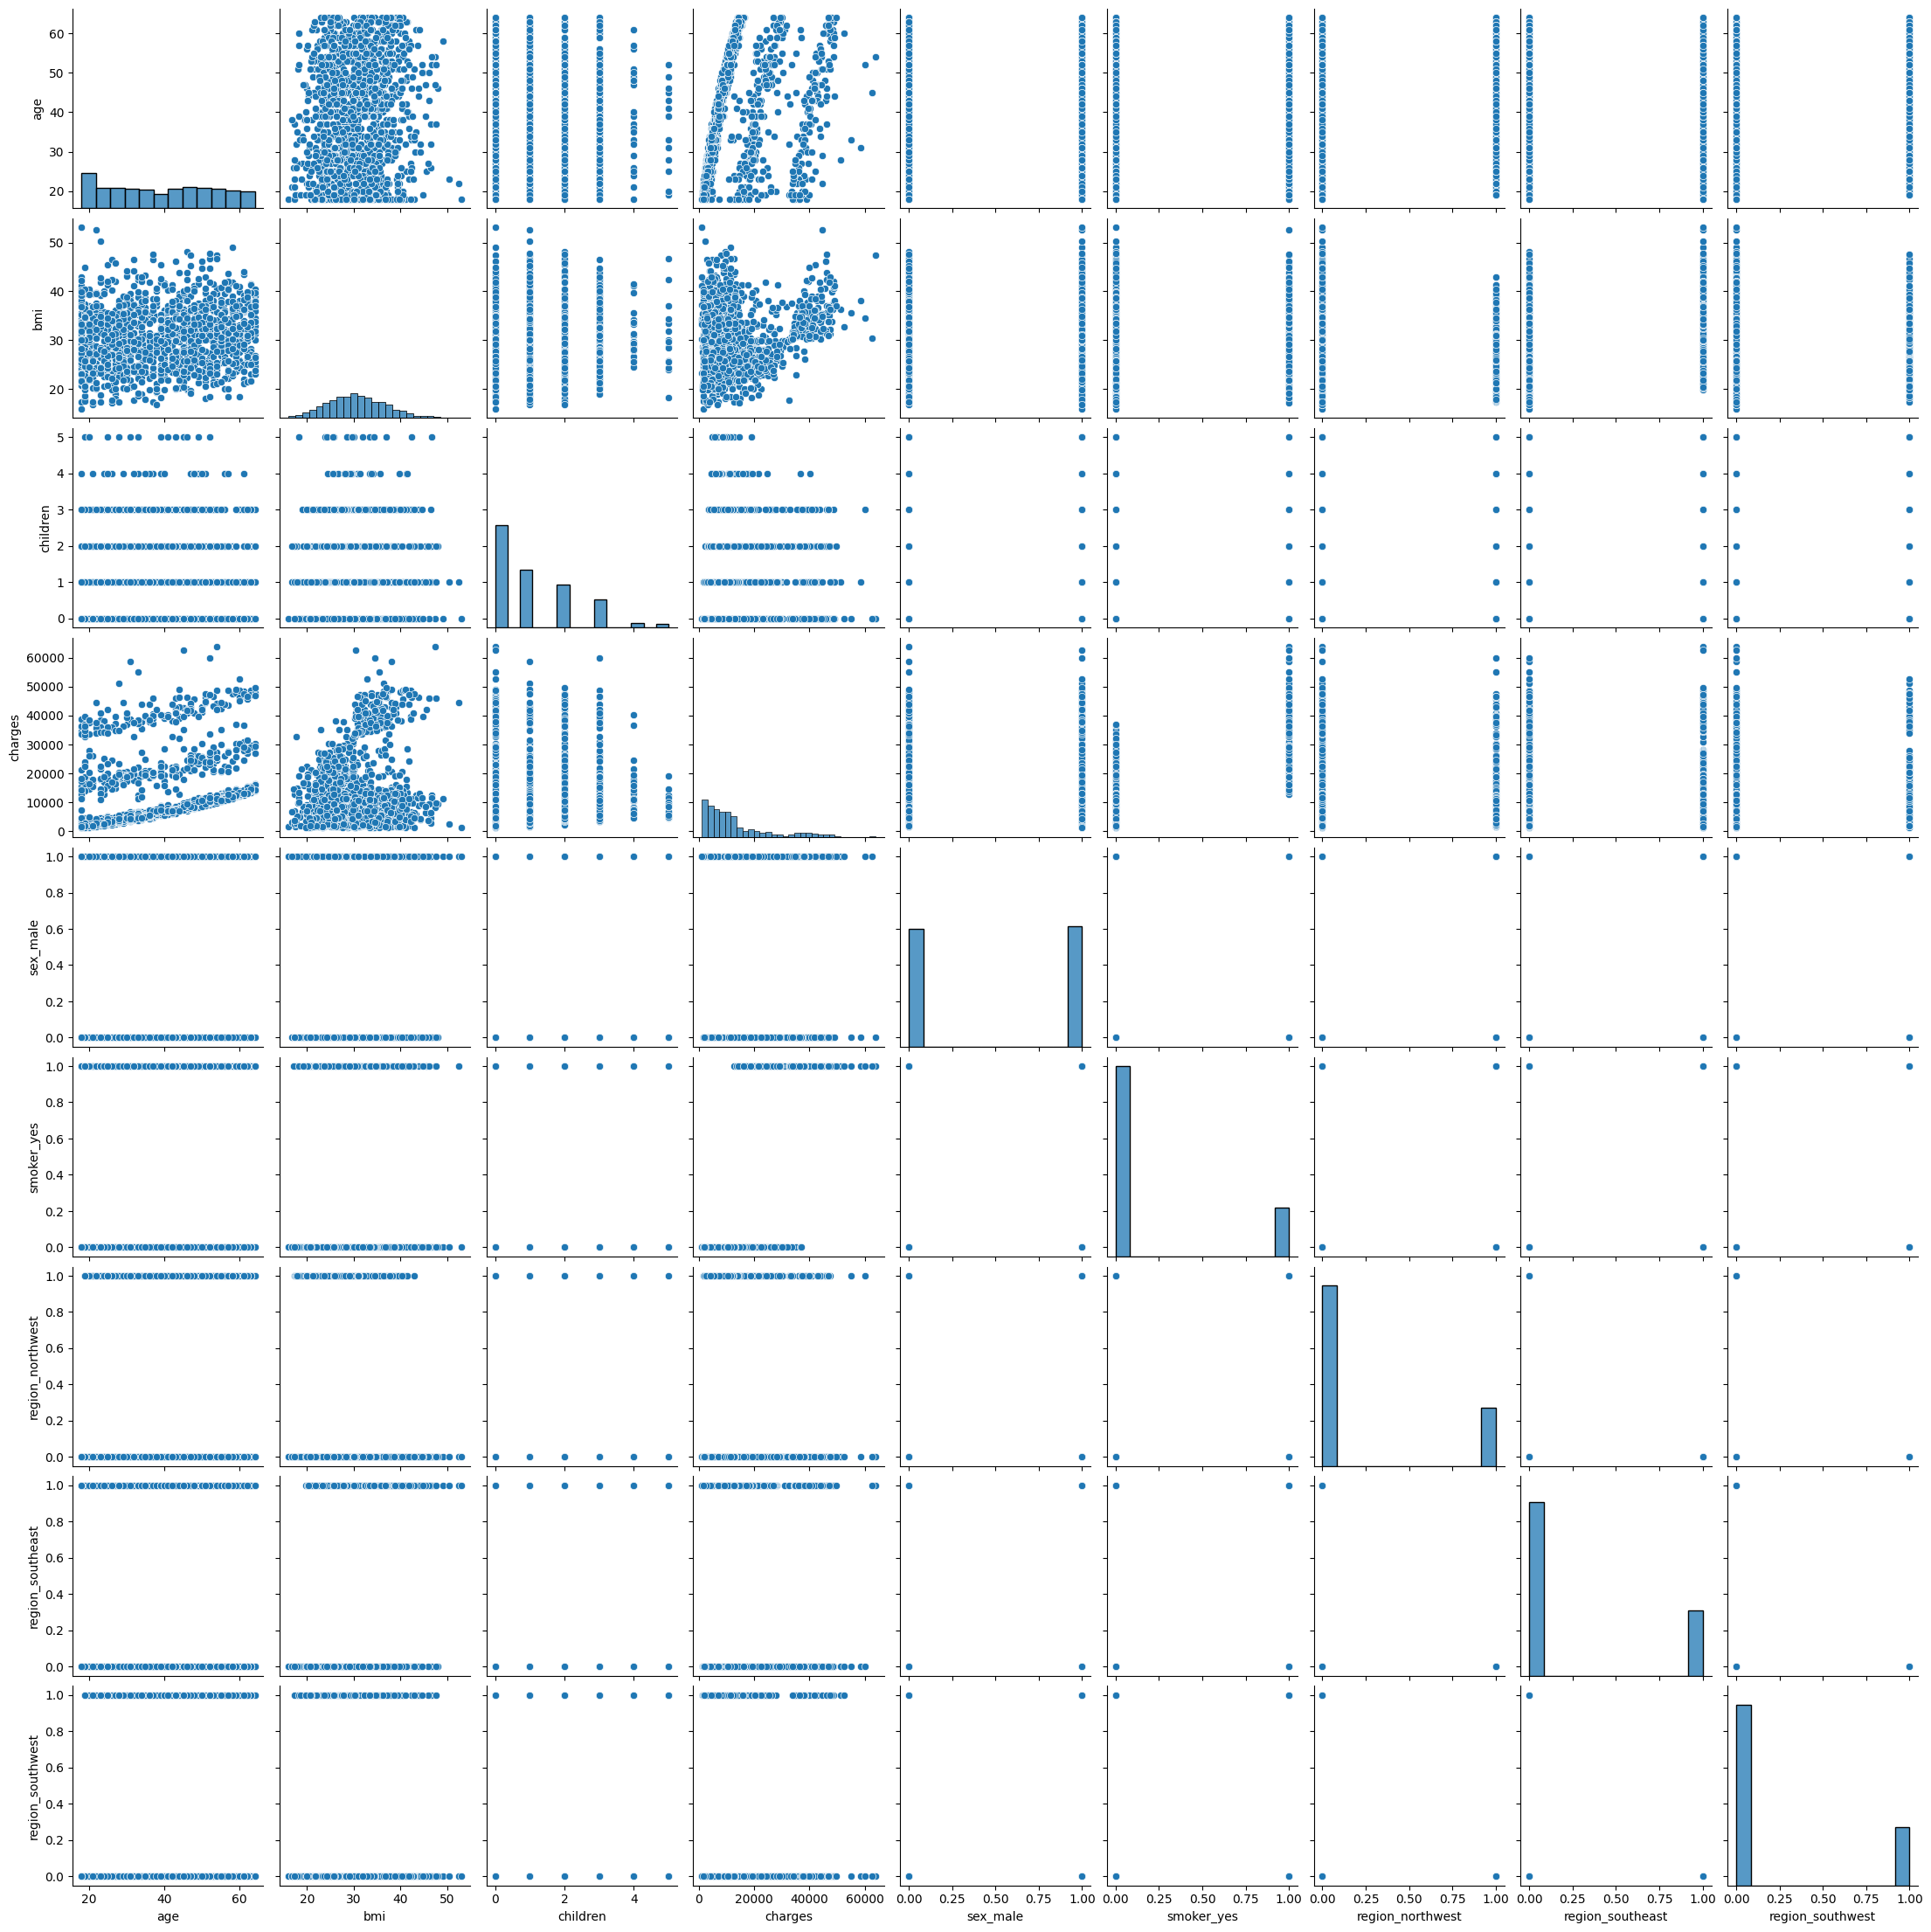

In [10]:
sns.pairplot(data)


<ipython-input-11-f62932478f9b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


<Axes: xlabel='charges', ylabel='Density'>

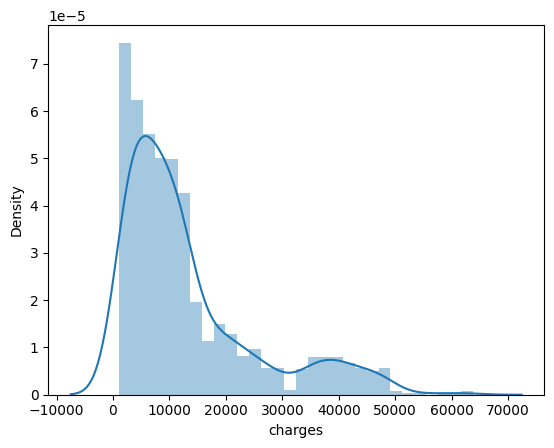

In [11]:

sns.distplot(data['charges'])

In [12]:
print(data.columns.tolist())


['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [13]:

X=data[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y=data['charges']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 )

In [15]:
##LINEAR REGRESSION

model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.intercept_
# modelin doğrusal regresyon denkleminde yer alan sabit terimi temsil eder.
#Yani, tüm bağımsız değişkenlerin (özelliklerin) sıfır olduğu durumda bağımlı değişkenin (hedefin) aldığı değeri gösterir.

-12027.937266659666

In [17]:
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['Öznitelik Katsayısı'])
coeff_df
#bağımsız değişkenlerin (özelliklerin, özniteliklerin) model üzerindeki etkisini
#gösteren katsayıları (coefficients) bir pandas DataFrame formatında daha okunabilir hale getirir

,Öznitelik Katsayısı
age,259.661428
bmi,333.430050
children,449.993236
sex_male,-39.776593
smoker_yes,24109.628142
region_northwest,-32.176318
region_southeast,-907.736232
region_southwest,-650.170677


In [18]:
y_pred_egitim=model.predict(X_train)
for i,prediction in enumerate(y_pred_egitim):
  print('Tahmin edilen değer: {:.2f}, Gerçek değerler {:.2f}'.format(prediction, y_train.iloc[i]))
#modelin tahmin ettiği değerleri ve gerçek değerleri karşılaştırmak için kullanılır
#X_train: Eğitim verisindeki bağımsız değişkenler (modelin öğrendiği veri).
#model.predict(X_train): Modelin, X_train verisine bakarak tahmin ettiği y (hedef) değerleri.

Tahmin edilen değer: 15676.14, Gerçek değerler 14313.85
Tahmin edilen değer: 9802.43, Gerçek değerler 8823.28
Tahmin edilen değer: 12743.29, Gerçek değerler 10269.46
Tahmin edilen değer: 13390.28, Gerçek değerler 12557.61
Tahmin edilen değer: 957.71, Gerçek değerler 2913.57
Tahmin edilen değer: 112.47, Gerçek değerler 21595.38
Tahmin edilen değer: 14000.43, Gerçek değerler 20630.28
Tahmin edilen değer: 31170.25, Gerçek değerler 37079.37
Tahmin edilen değer: 10458.66, Gerçek değerler 4266.17
Tahmin edilen değer: 29583.98, Gerçek değerler 19539.24
Tahmin edilen değer: 12523.23, Gerçek değerler 12096.65
Tahmin edilen değer: 3166.36, Gerçek değerler 2721.32
Tahmin edilen değer: 3377.02, Gerçek değerler 3558.62
Tahmin edilen değer: 29910.05, Gerçek değerler 19023.26
Tahmin edilen değer: 6438.03, Gerçek değerler 3393.36
Tahmin edilen değer: 2129.59, Gerçek değerler 2155.68
Tahmin edilen değer: 8252.86, Gerçek değerler 12404.88
Tahmin edilen değer: 37462.52, Gerçek değerler 44260.75
Tahmin ed

In [19]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_egitim)

0.7524521560193709

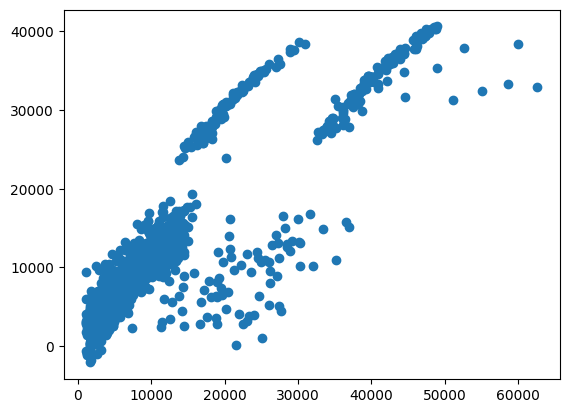

In [20]:
plt.scatter(y_train,y_pred_egitim)
#y_train: X ekseninde, eğitim verisindeki gerçek değerler (bağımlı değişkenler) gösterilir.
#y_pred_egitim:Y ekseninde, modelin eğitim verisi üzerinde tahmin ettiği değerler gösterilir.

In [21]:

y_pred_test=model.predict(X_test)
for i,prediction in enumerate(y_pred_test):
  print('Tahmin edilen değer: {:.2f}, Gerçek değerler {:.2f}'.format(prediction, y_test.iloc[i]))
# test verileri üzerindeki tahminleri ile gerçek test verisi değerlerini karşılaştırmak için kullanılır.

Tahmin edilen değer: 18261.28, Gerçek değerler 15170.07
Tahmin edilen değer: 30106.97, Gerçek değerler 37484.45
Tahmin edilen değer: 543.02, Gerçek değerler 2680.95
Tahmin edilen değer: 24509.55, Gerçek değerler 26125.67
Tahmin edilen değer: 30622.10, Gerçek değerler 38344.57
Tahmin edilen değer: 10932.23, Gerçek değerler 11073.18
Tahmin edilen değer: 12889.23, Gerçek değerler 7448.40
Tahmin edilen değer: 27873.44, Gerçek değerler 34166.27
Tahmin edilen değer: 35674.81, Gerçek değerler 26926.51
Tahmin edilen değer: 11399.16, Gerçek değerler 10594.50
Tahmin edilen değer: 7196.37, Gerçek değerler 5240.77
Tahmin edilen değer: 11444.93, Gerçek değerler 8334.46
Tahmin edilen değer: 607.32, Gerçek değerler 2803.70
Tahmin edilen değer: 11588.81, Gerçek değerler 12523.60
Tahmin edilen değer: 10217.36, Gerçek değerler 7441.50
Tahmin edilen değer: 6409.58, Gerçek değerler 3292.53
Tahmin edilen değer: 13109.66, Gerçek değerler 10601.63
Tahmin edilen değer: 41003.59, Gerçek değerler 63770.43
Tahmi

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7412461575094067

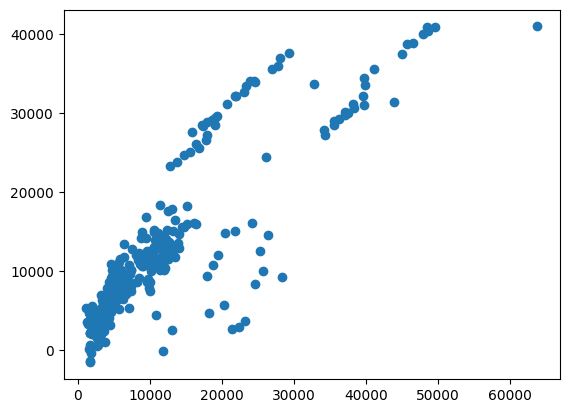

In [23]:
plt.scatter(y_test,y_pred_test)

In [24]:
#['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
age=18
bmi=33.77
children=1
sex_male=1
smoker_yes=0
region_northwest=0
region_southeast=1
region_southwest=0
print(model.predict([[age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest]]))

[3408.38164272]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.linear_model import Lasso


In [26]:


##LASSO REGRESSION
lasso=Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [27]:
print("Eğitim skoru: ",train_score)
print("Test skoru: ",test_score)
print("Kullanılan öznitelik sayısı: ",coeff_used)
#Eğitim ve test verisi performansları R² skoru ile ölçülüyor.
#Sıfır olmayan katsayıların sayısı ile modelin kaç bağımsız değişkeni aktif olarak kullandığı belirleniyor.

Eğitim skoru:  0.7524517462661523
Test skoru:  0.7411984911381433
Kullanılan öznitelik sayısı:  8


In [28]:
#Özellik Seçimi (Feature Selection): Lasso Regresyonu, modeldeki özelliklerin bazılarını sıfır katsayı ile modelden çıkarır.
#Bu sayede, sadece önemli olan değişkenleri tutarak gereksiz olanları eler. Özellikle çok fazla özelliğin bulunduğu durumlarda etkili bir yöntemdir.

#Aşırı Uyum (Overfitting): Lasso Regresyonu, modelin veriye aşırı uyum sağlamasını (overfitting) önlemek için L1 regularizasyon terimini ekler.
#Bu terim, modelin karmaşıklığını azaltır ve sadece en önemli özelliklere odaklanmasını sağlar.

In [29]:
lasso001=Lasso(alpha=0.01,max_iter=100000)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, max_iter=100000)

In [30]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
# model üzerindeki cezalandırma gücünü belirler. alpha ne kadar büyük olursa, o kadar fazla
#regularizasyon uygulanır, yani daha fazla katsayı sıfıra yaklaşır
print("Eğitim verisi için r2(alpha=0.01): ",train_score001)
print("Test verisi için r2(alpha=0.01): ",test_score001)
print("Kullanılan öznitelik sayısı(alpha=0.01): ",coeff_used001)

Eğitim verisi için r2(alpha=0.01):  0.7524521559784801
Test verisi için r2(alpha=0.01):  0.7412456857657599
Kullanılan öznitelik sayısı(alpha=0.01):  8


In [31]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000)
lasso00001.fit(X_train,y_train)

train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("Eğitim verisi için r2(alpha=0.0001): ",train_score00001)
print("Test verisi için r2(alpha=0.0001): ",test_score00001)
print("Kullanılan öznitelik sayısı(alpha=0.0001): ",coeff_used00001)

Eğitim verisi için r2(alpha=0.0001):  0.7524521560193669
Test verisi için r2(alpha=0.0001):  0.7412461527917693
Kullanılan öznitelik sayısı(alpha=0.0001):  8


In [32]:
##SONUÇLARI DOĞRUSAL REGRESYON İLE KARŞILAŞTIRALIM
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("Eğitim setinin r2 si : ",lr_train_score)
print("Test setinin r2 si : ",lr_test_score)

Eğitim setinin r2 si :  0.7524521560193709
Test setinin r2 si :  0.7412461575094067


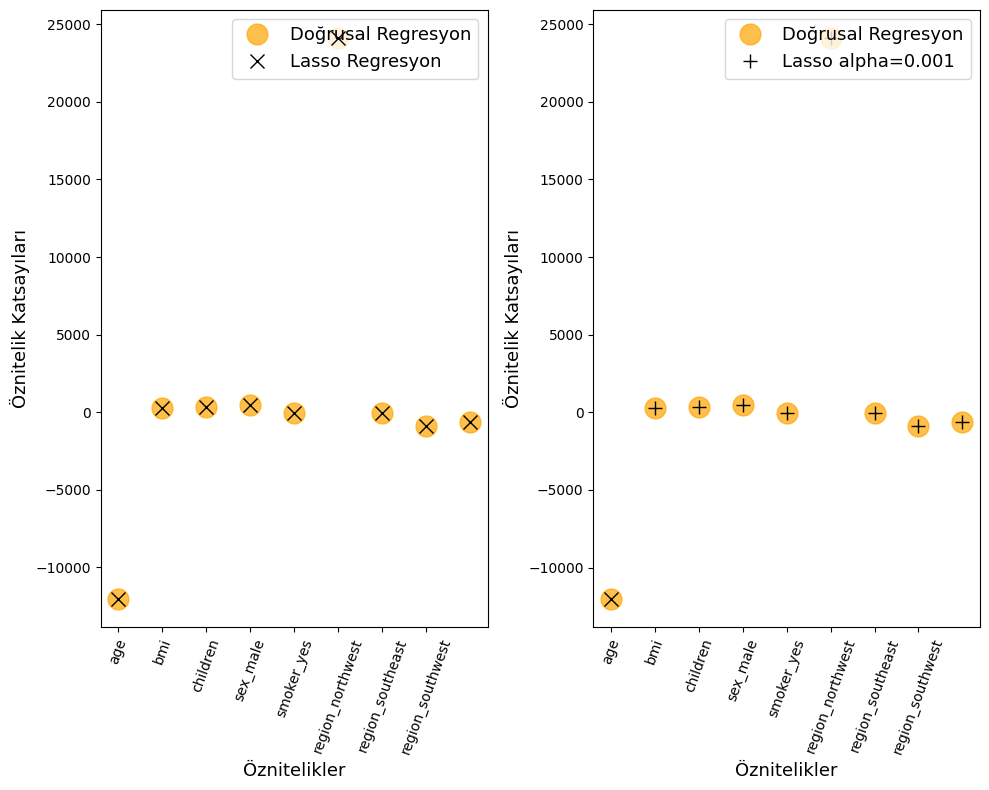

In [33]:
##GRAFİK KONTROLÜ: LASSO DEĞERLERİ İLE DOĞRUSAL REGRESYON KIYASLAMASI
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

# İlk grafik (subplot 1)
plt.subplot(1, 2, 1)
plt.plot((1,2,3,4,5,6,7,8), lr.coef_, alpha=0.7, linestyle='none', marker='o', markersize=15, color='orange', label='Doğrusal Regresyon', zorder=2)
plt.plot((1,2,3,4,5,6,7,8), lasso.coef_, alpha=1, linestyle='none', marker='x', markersize=10, color='black', label='Lasso Regresyon', zorder=7)
plt.plot(0, lr.intercept_, alpha=0.7, linestyle='none', marker='o', markersize=15, color='orange')
plt.plot(0, lasso.intercept_, alpha=1, linestyle='none', marker='x', markersize=10, color='black')

plt.xticks([0,1,2,3,4,5,6,7], ('age', 'bmi', 'children','sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest'), rotation=70)
plt.xlabel('Öznitelikler', fontsize=13)
plt.ylabel('Öznitelik Katsayıları', fontsize=13)
plt.legend(fontsize=13, loc='upper right')

# İkinci grafik (subplot 2)
plt.subplot(1, 2, 2)
plt.plot((1,2,3,4,5,6,7,8), lr.coef_, alpha=0.7, linestyle='none', marker='o', markersize=15, color='orange', label='Doğrusal Regresyon', zorder=2)
plt.plot((1,2,3,4,5,6,7,8), lasso001.coef_, alpha=1, linestyle='none', marker='+', markersize=10, color='black', label='Lasso alpha=0.001')

plt.plot(0, lr.intercept_, alpha=0.7, linestyle='none', marker='o', markersize=15, color='orange')
plt.plot(0, lasso001.intercept_, alpha=1, linestyle='none', marker='x', markersize=10, color='black')

plt.xticks([0,1,2,3,4,5,6,7], ('age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest'), rotation=70)
plt.xlabel('Öznitelikler', fontsize=13)
plt.ylabel('Öznitelik Katsayıları', fontsize=13)
plt.legend(fontsize=13, loc='upper right')

# Aralıkların düzeltilmesi ve grafiğin gösterilmesi
plt.tight_layout()
plt.show()


In [34]:
##POLİNOM DERECESİ OLUŞTURMA FONKSİYONU
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [35]:
##rmses = []: Bu boş liste, ilerleyen adımlarda çeşitli dereceler için hesaplanacak RMSE (Root Mean Square Error)
#değerlerini saklamak için kullanılır.
#degrees = np.arange(1, 10): Bu, 1 ile 9 arasındaki tam sayıları içeren bir NumPy dizisidir.
#Burada degrees, örneğin bir polinomun derecelerini ifade edebilir. Bu dereceler, modelin farklı derecelerle eğitilerek hatalarının (RMSE) karşılaştırılmasında kullanılacak.
#min_rmse,max_deg = 100000000000,0: Bu satırda, min_rmse değişkeni, başlangıçta çok büyük bir değerle (100 milyar) başlatılır
#ilerleyen adımlarda en düşük RMSE değeri bulunurken güncellenecektir. max_deg ise, bu en düşük RMSE'yi veren polinomun derecesini saklayacaktır (başlangıçta 0 olarak ayarlanmış).
rmses = []
degrees = np.arange(1, 10)
min_rmse,max_deg = 100000000000,0

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

rmses = []
degrees = np.arange(1, 10)
min_rmse, max_deg = 100000000000, 0

for deg in degrees:

    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)


    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)

    # Test seti ile karşılaştırılması
    X_poly_test = poly_features.fit_transform(X_test)
    poly_predict_test = poly_reg.predict(X_poly_test)


    poly_mse = mean_squared_error(y_test, poly_predict_test)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    # Çapraz doğrulama ile polinom dereceleri
    if poly_rmse < min_rmse:
        min_rmse = poly_rmse
        max_deg = deg


In [37]:
print('en iyi model {} rmse hata skorunu veren {} polinom derecesi ile sağlanıyor'.format(min_rmse,max_deg))

en iyi model 4364.381633334664 rmse hata skorunu veren 2 polinom derecesi ile sağlanıyor


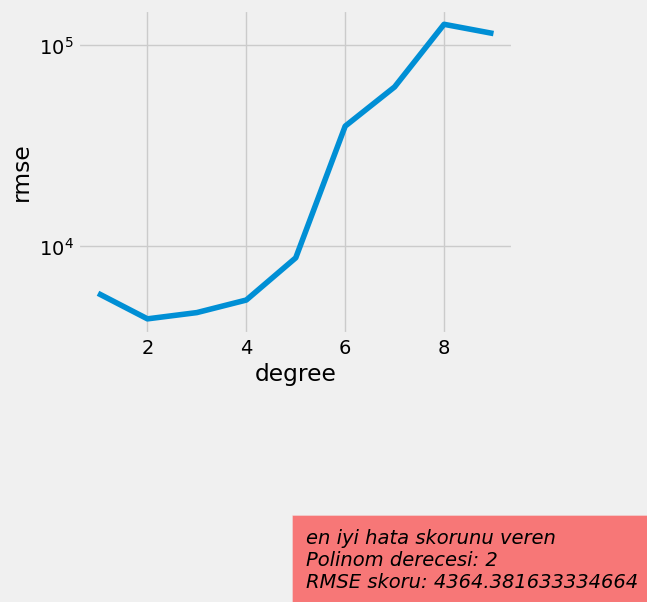

In [38]:
#TÜM POLİNOM DERECELERİ İÇİN RMSE SKORLARI
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('degree')
ax.set_ylabel('rmse')
plt.text(5.2,200,('en iyi hata skorunu veren \nPolinom derecesi: {} \nRMSE skoru: {}'.format(max_deg,min_rmse)),style='italic',bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.show()


In [39]:

#Polinom derecesini belirledik artık modeli bu polinom derecesine göre oluşturabiliriz.


In [40]:
#öznitelik değişkeninin karesel derecesini belirleyelim
polinom_derecesi = PolynomialFeatures(degree = 2)
X_train_polinom = polinom_derecesi.fit_transform(X_train)
X_test_polinom = polinom_derecesi.transform(X_test)

In [41]:
#polinom regresyon algoritmasını eğitelim
polinom_reg = LinearRegression()
polinom_reg.fit(X_train_polinom, y_train)


LinearRegression()

In [42]:
#çoklu regresyon modelin eğitimve test setleri için öngörü performansı:
print('polinom reg r2:',polinom_reg.score(X_train_polinom,y_train))
print('polinom reg r2:',polinom_reg.score(X_test_polinom,y_test))

polinom reg r2: 0.8449389320494143
polinom reg r2: 0.8558878910457302


In [43]:
model = LinearRegression()
model.fit(X_train, y_train)
print('doğrusal reg r2 :', model.score(X_train,y_train))
print('doğrusal reg r2 :', model.score(X_test,y_test))


doğrusal reg r2 : 0.7524521560193709
doğrusal reg r2 : 0.7412461575094067


In [44]:
#eğitim seti için tahmin edilen değerler ile gerçek değerlerin karşılaştırılması
y_pred_egitim = polinom_reg.predict(  X_train_polinom)
for i,prediction in enumerate(y_pred_egitim):
  print('Tahmin edilen değer: {:.2f}, Gerçek değerler {:.2f}'.format(prediction, y_train.iloc[i]))


Tahmin edilen değer: 15753.02, Gerçek değerler 14313.85
Tahmin edilen değer: 10373.08, Gerçek değerler 8823.28
Tahmin edilen değer: 12723.04, Gerçek değerler 10269.46
Tahmin edilen değer: 15706.90, Gerçek değerler 12557.61
Tahmin edilen değer: 4205.90, Gerçek değerler 2913.57
Tahmin edilen değer: 1879.89, Gerçek değerler 21595.38
Tahmin edilen değer: 11499.55, Gerçek değerler 20630.28
Tahmin edilen değer: 34957.09, Gerçek değerler 37079.37
Tahmin edilen değer: 4295.56, Gerçek değerler 4266.17
Tahmin edilen değer: 23486.17, Gerçek değerler 19539.24
Tahmin edilen değer: 14298.33, Gerçek değerler 12096.65
Tahmin edilen değer: 3991.72, Gerçek değerler 2721.32
Tahmin edilen değer: 5060.97, Gerçek değerler 3558.62
Tahmin edilen değer: 13826.71, Gerçek değerler 19023.26
Tahmin edilen değer: 7485.93, Gerçek değerler 3393.36
Tahmin edilen değer: 3404.82, Gerçek değerler 2155.68
Tahmin edilen değer: 6325.94, Gerçek değerler 12404.88
Tahmin edilen değer: 40958.09, Gerçek değerler 44260.75
Tahmin 

In [45]:
#test seti için gerçek değerler ile tahmin değerlerini karşılaştıralım
y_pred_test = polinom_reg.predict(  X_test_polinom)
for i,prediction in enumerate(y_pred_test):
  print('Tahmin edilen değer: {:.2f}, Gerçek değerler {:.2f}'.format(prediction, y_test.iloc[i]))

Tahmin edilen değer: 16408.61, Gerçek değerler 15170.07
Tahmin edilen değer: 35774.93, Gerçek değerler 37484.45
Tahmin edilen değer: 1967.95, Gerçek değerler 2680.95
Tahmin edilen değer: 17252.44, Gerçek değerler 26125.67
Tahmin edilen değer: 41047.05, Gerçek değerler 38344.57
Tahmin edilen değer: 12258.11, Gerçek değerler 11073.18
Tahmin edilen değer: 9208.97, Gerçek değerler 7448.40
Tahmin edilen değer: 30232.66, Gerçek değerler 34166.27
Tahmin edilen değer: 30505.17, Gerçek değerler 26926.51
Tahmin edilen değer: 11510.14, Gerçek değerler 10594.50
Tahmin edilen değer: 6435.48, Gerçek değerler 5240.77
Tahmin edilen değer: 10146.42, Gerçek değerler 8334.46
Tahmin edilen değer: 3967.17, Gerçek değerler 2803.70
Tahmin edilen değer: 13093.75, Gerçek değerler 12523.60
Tahmin edilen değer: 8495.89, Gerçek değerler 7441.50
Tahmin edilen değer: 5877.62, Gerçek değerler 3292.53
Tahmin edilen değer: 11933.93, Gerçek değerler 10601.63
Tahmin edilen değer: 56575.81, Gerçek değerler 63770.43
Tahmi

In [46]:
X_poly=polinom_derecesi.transform(X)
data['hedef_tahmin']=polinom_reg.predict(X_poly)

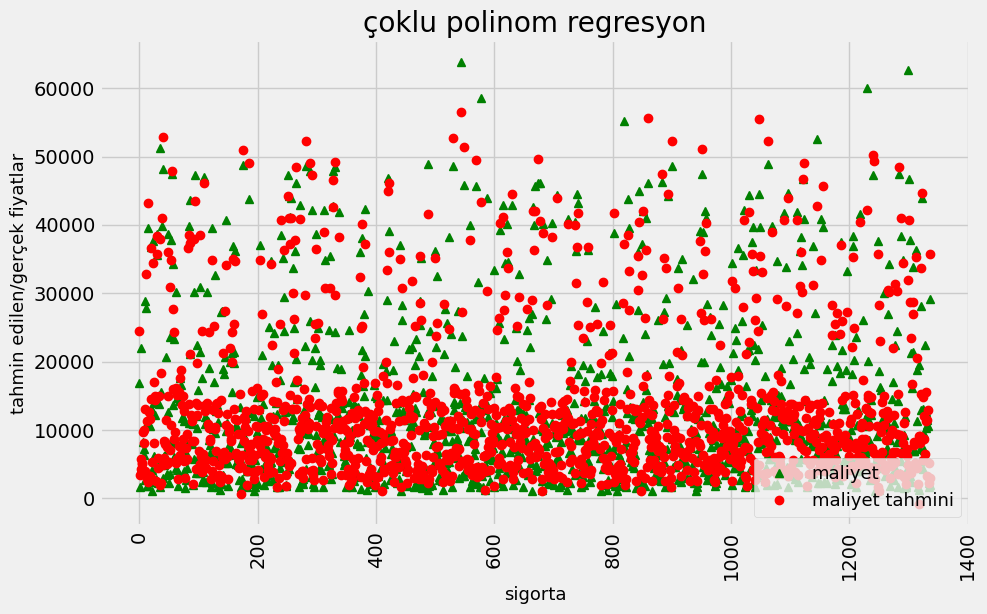

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
plt.title('çoklu polinom regresyon')

# X ekseni: index, Y ekseni: charges ve hedef_tahmin
plt.plot(data.index, data['charges'], 'g^', label='maliyet')
plt.plot(data.index, data['hedef_tahmin'], 'ro', label='maliyet tahmini')

plt.xlabel('sigorta', fontsize=13)
plt.ylabel('tahmin edilen/gerçek fiyatlar', fontsize=13)

plt.xticks(rotation=90)  # X eksenindeki etiketleri dikey yapın
plt.legend(fontsize=13, loc='lower right')
plt.show()



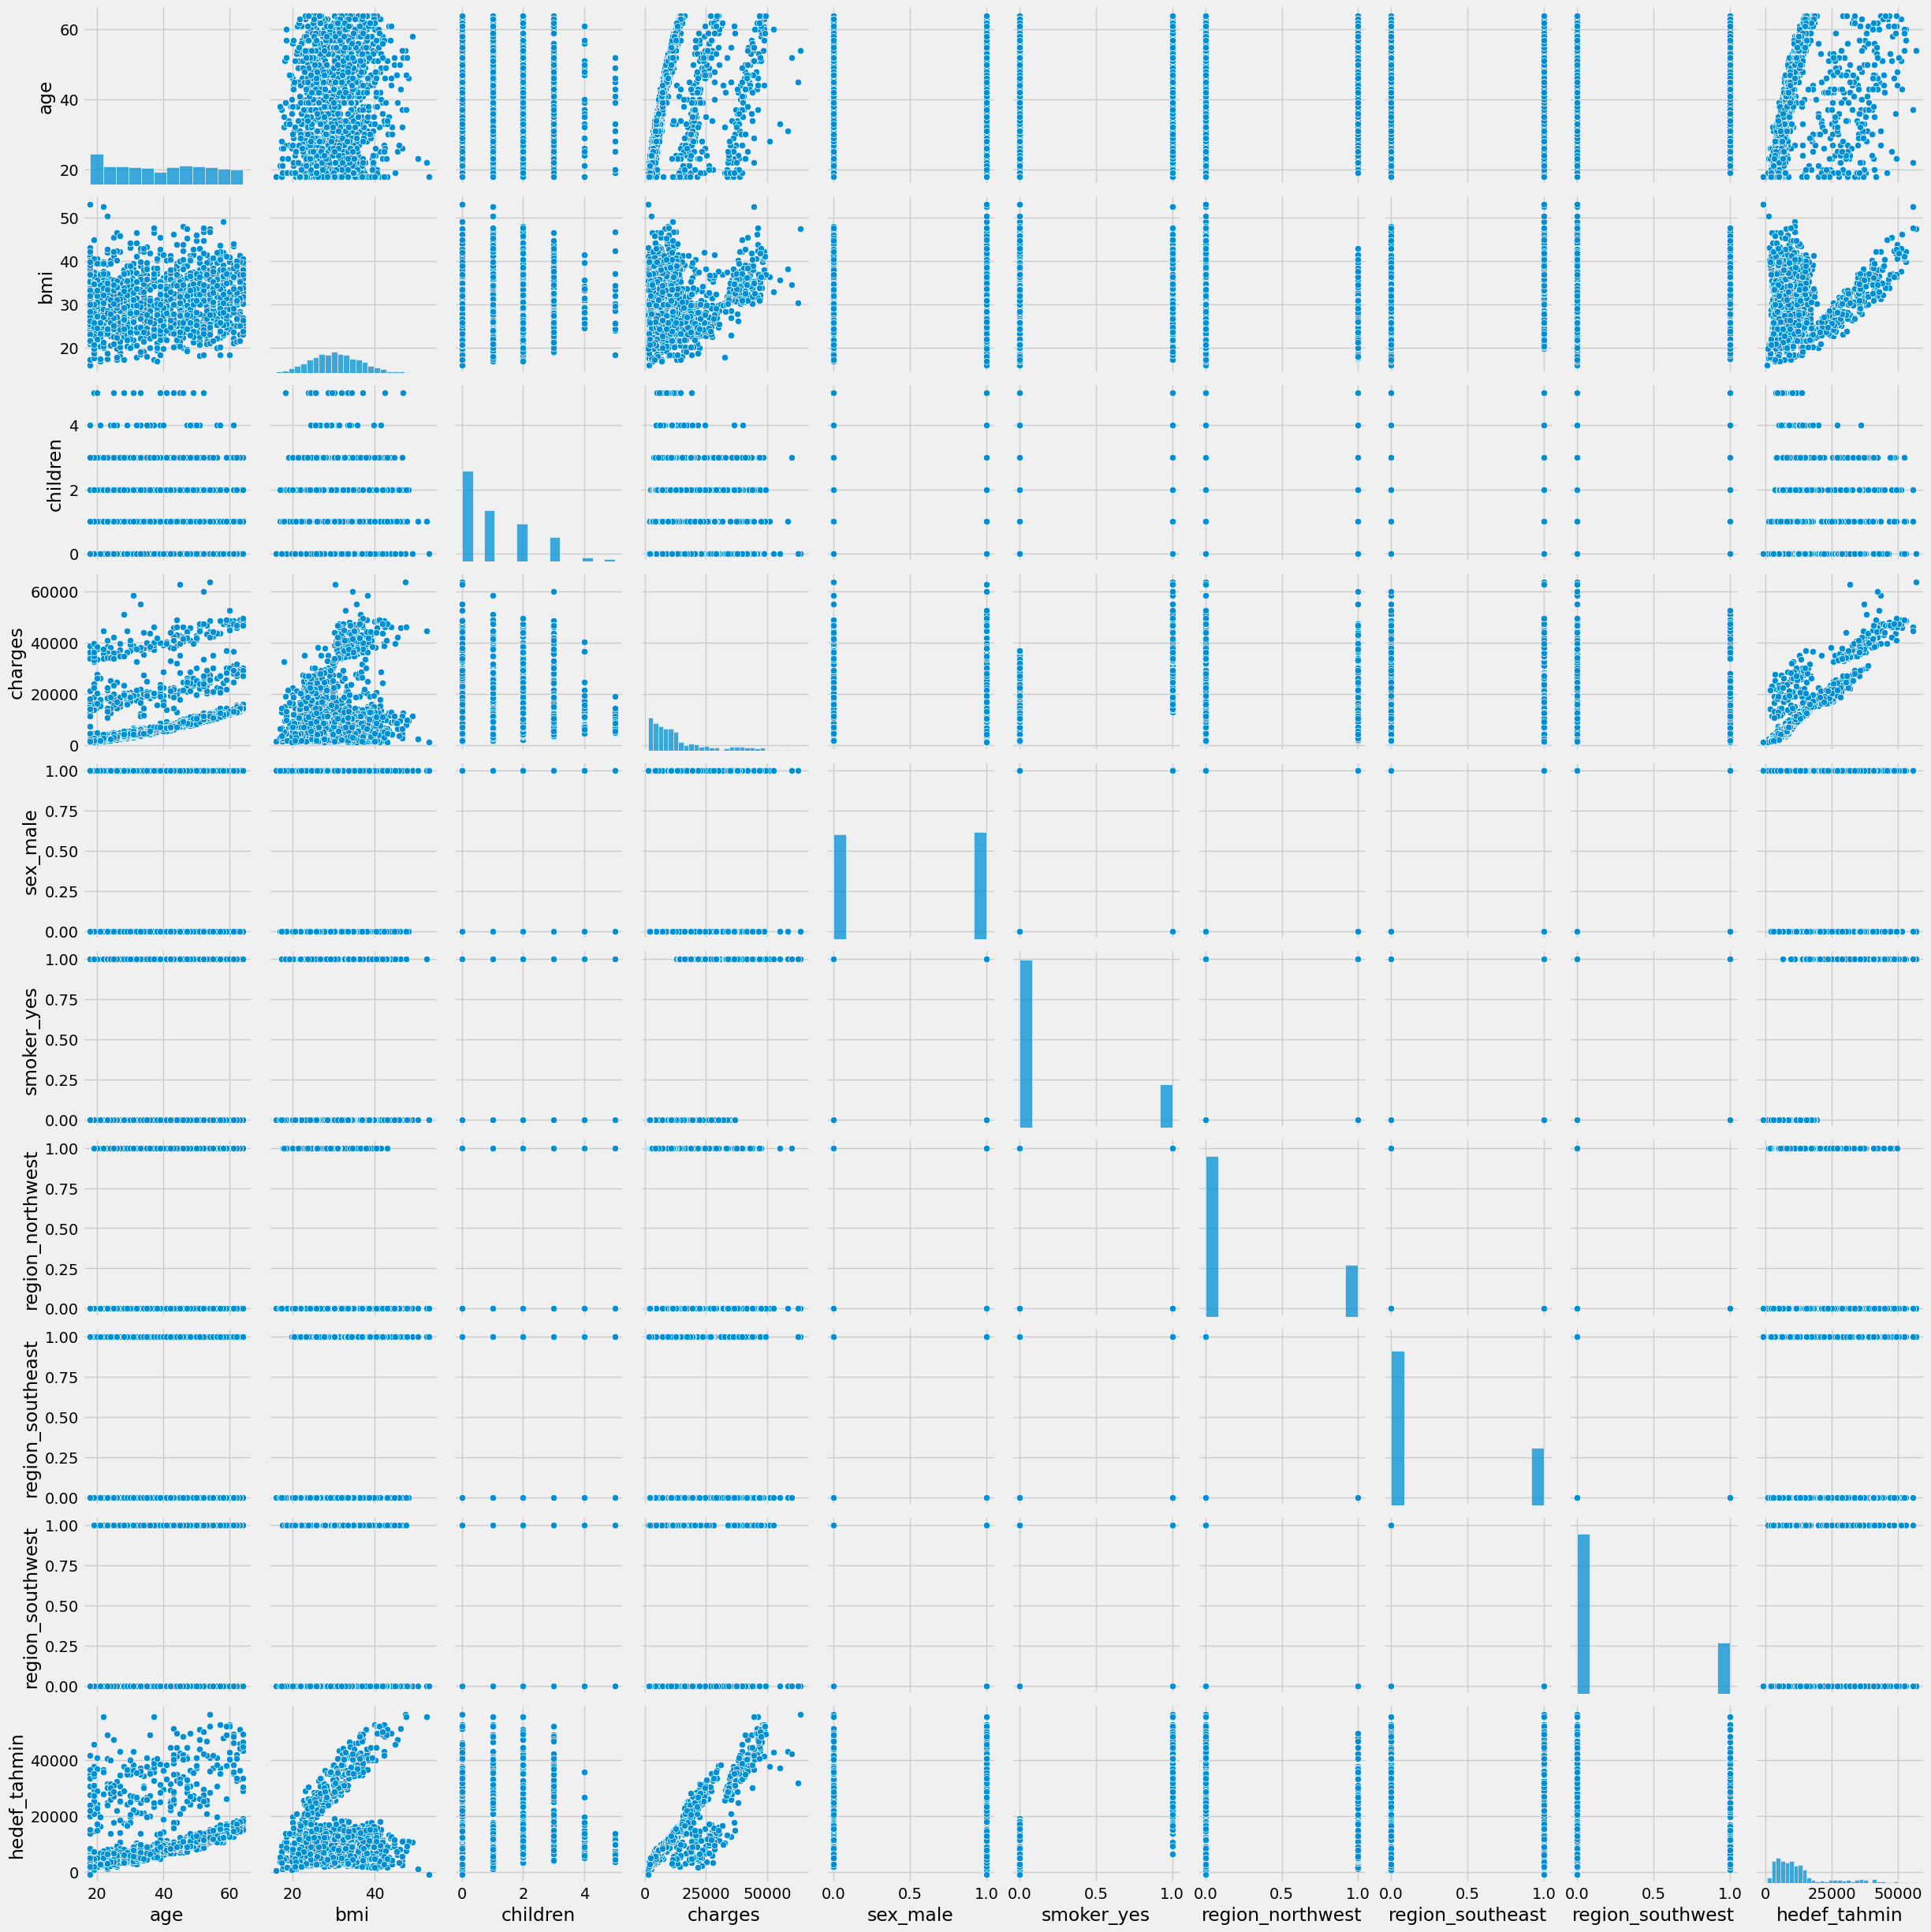

In [48]:
g = sns.pairplot(data)


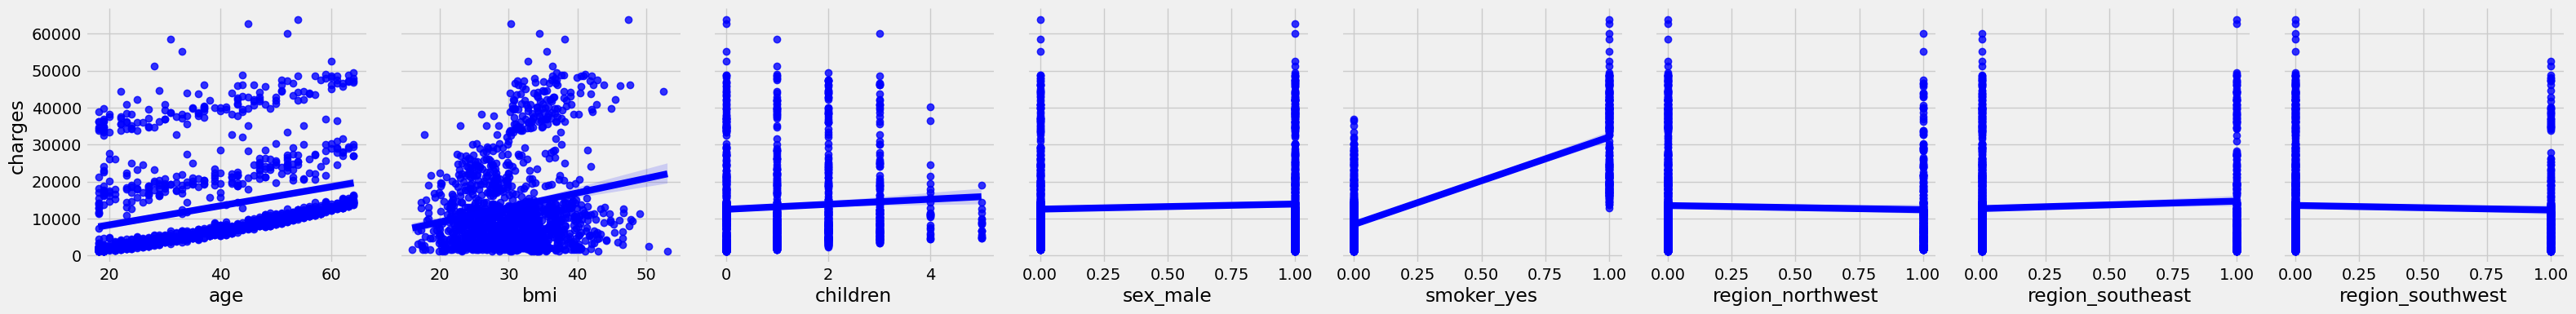

In [49]:
g = sns.PairGrid(data, y_vars=["charges"], x_vars=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
                                                   'region_northwest', 'region_southeast', 'region_southwest'],height=4)
g.map(sns.regplot,lowess=False,color='blue')



In [50]:
#eğer hedef değişkenin(charges) her bir öznitelikle regresyonunu alsaydık oluşturulacak thmin doğruları bu şekilde olacaktı.

/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


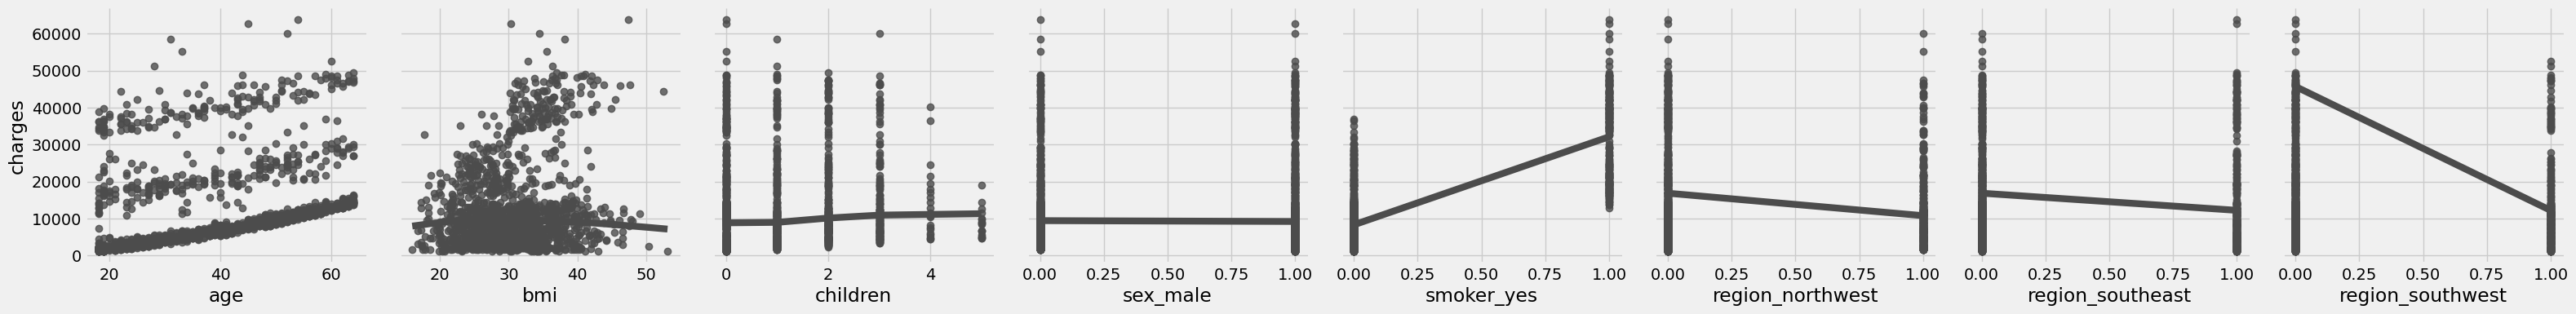

In [51]:
#LOWESS EĞRİSİ hedef değişken ile öznitelik arasındaki ilişki doğrusal mı değil mi ona bakar
g = sns.PairGrid(data, y_vars=["charges"], x_vars=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
                                                   'region_northwest', 'region_southeast', 'region_southwest'],height=4)
g.map(sns.regplot,lowess=True,color='.3')

/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.11/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


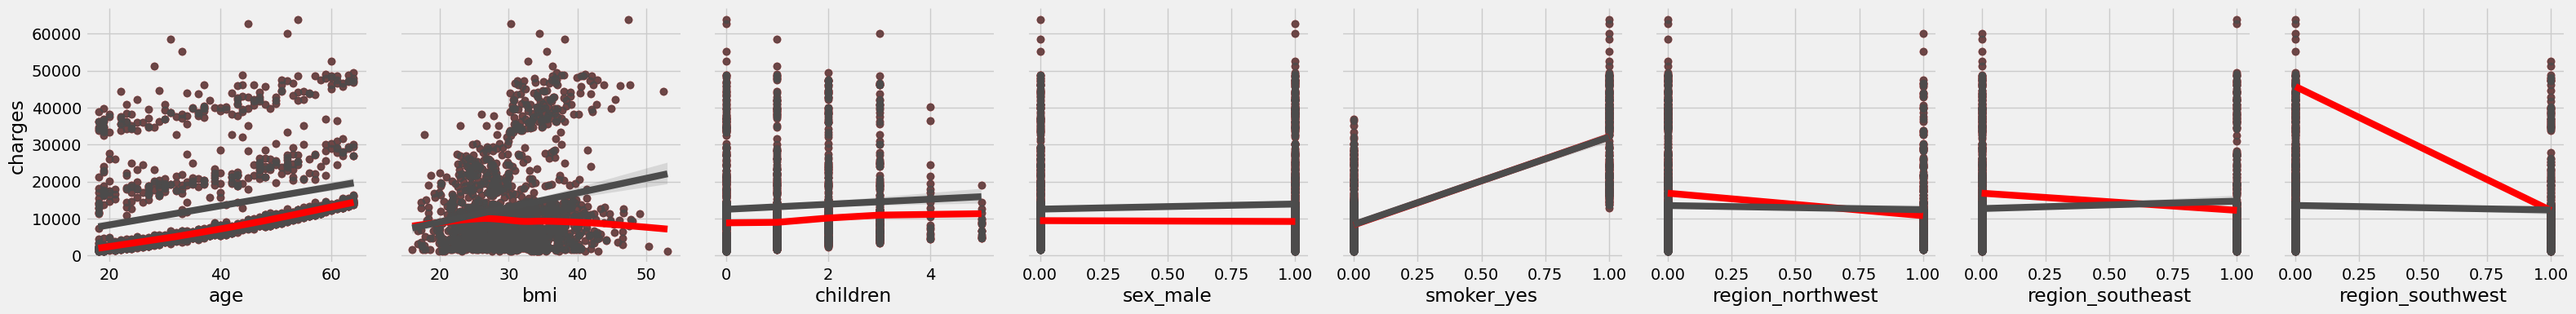

In [52]:
#lowess ve kısmii doğrusal regresyon tahmin doğrularını karşılaştırarak hangi öznitelik değişkenlerinin hedef
#değişken ile doğrusal olmayan ilişkiye sahip olduğunu gözlemleyebiliriz
g = sns.PairGrid(data, y_vars=["charges"], x_vars=['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
                                                   'region_northwest', 'region_southeast', 'region_southwest'],height=4)
g.map(sns.regplot,lowess=True,color='red')
g.map(sns.regplot,lowess=False,color='.3')

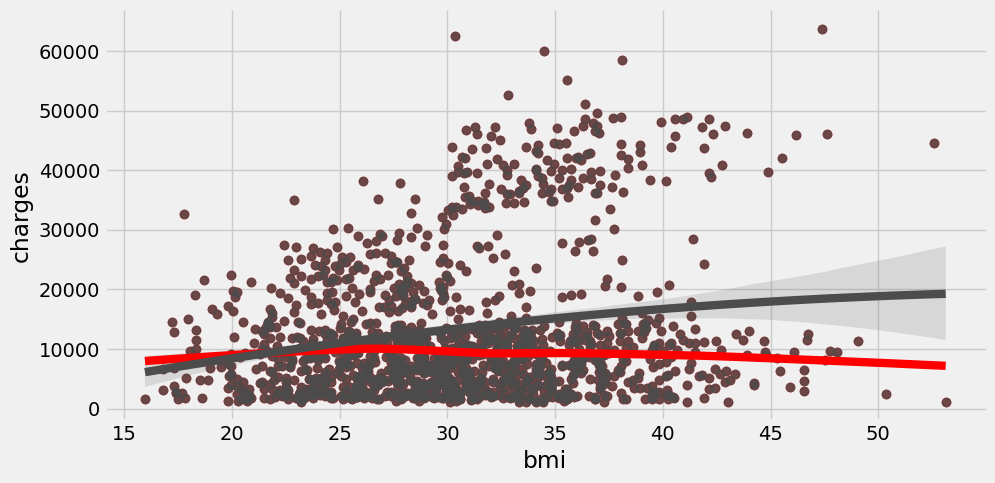

In [53]:
g = sns.PairGrid(data, y_vars=["charges"], x_vars=['bmi'],height=5,aspect=2)
g.map(sns.regplot,lowess=True,color='red')
g.map(sns.regplot,lowess=False,color='.3',order=2)



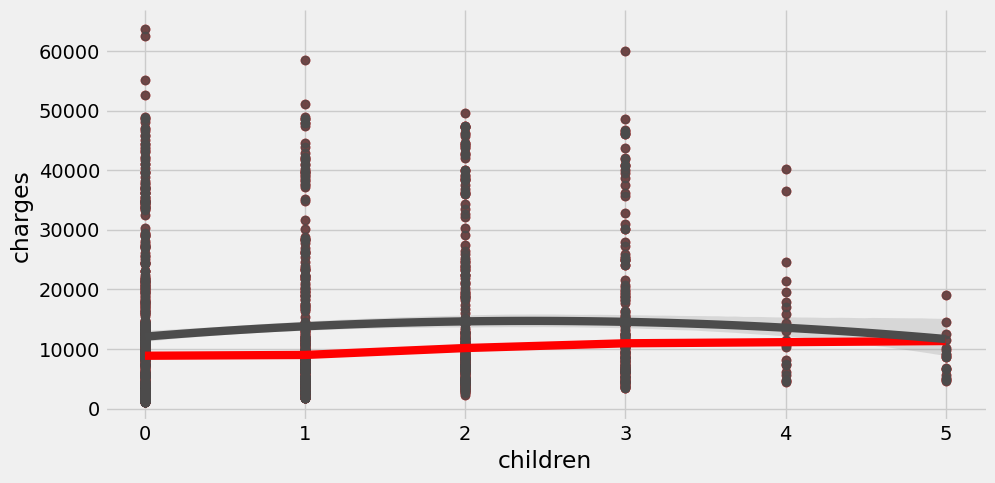

In [54]:
g = sns.PairGrid(data, y_vars=["charges"], x_vars=['children'],height=5,aspect=2)
g.map(sns.regplot,lowess=True,color='red')
g.map(sns.regplot,lowess=False,color='.3',order=2)

In [55]:
#sex sütunu zatn oğrusal olduğundan sorunlu bir grafik çıktısı alıyoruz

In [56]:
#NOTLAR
#Tüm özniteliklerin hedef değişkenle ilişkisi doğrusal olmayabilir
#özniteliklerin hedef değişkenle ilişkisi doğrusal olmasa bile hepsinin doğrusal olmama (polinom) derecesi farklı olabilir.
#polinom regresyon yaparken her bir özniteliğin hedef değişken ile ilişksinin,doğrusal olup olmadığını, değilse derecesini dikkate almak gerekir.


In [57]:
#hedef değişken ile polinom ilişkiye sahip öznitelikler için en uygun polinom
#derecesini belirleyerek model oluşturalım.

In [58]:
df_train = pd.concat([X_train, y_train], axis=1,sort=True)
X1_train = df_train['children'].values.reshape(-1,1)
X2_train= df_train['bmi'].values.reshape(-1,1)
X3_train = df_train['age'].values.reshape(-1,1)
X4_train = df_train['sex_male'].values.reshape(-1,1)
X5_train = df_train['smoker_yes'].values.reshape(-1,1)
X6_train = df_train['region_northwest'].values.reshape(-1,1)
X7_train = df_train['region_southeast'].values.reshape(-1,1)
X8_train = df_train['region_southwest'].values.reshape(-1,1)


In [59]:
df_test =pd.concat([X_test, y_test], axis=1,sort=True)
X1_test = df_test['children'].values.reshape(-1,1)
X2_test= df_test['bmi'].values.reshape(-1,1)
X3_test = df_test['age'].values.reshape(-1,1)
X4_test = df_test['sex_male'].values.reshape(-1,1)
X5_test = df_test['smoker_yes'].values.reshape(-1,1)
X6_test = df_test['region_northwest'].values.reshape(-1,1)
X7_test = df_test['region_southeast'].values.reshape(-1,1)
X8_test = df_test['region_southwest'].values.reshape(-1,1)

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [61]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, max_deg = 100000000000,0
for deg in degrees:
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_poly_train = poly_features.fit_transform(X1_train)
  poly_reg = LinearRegression()
  poly_reg.fit(X_poly_train, y_train)
  X_poly_test = poly_features.fit_transform(X1_test)
  poly_predict_test = poly_reg.predict(X_poly_test)
  poly_mse = mean_squared_error(y_test, poly_predict_test)
  poly_rmse = np.sqrt(poly_mse)
  rmses.append(poly_mse)
  if poly_rmse < min_rmse:
    min_rmse = poly_rmse
    min_deg = deg


Text(0, 0.5, 'rmse')

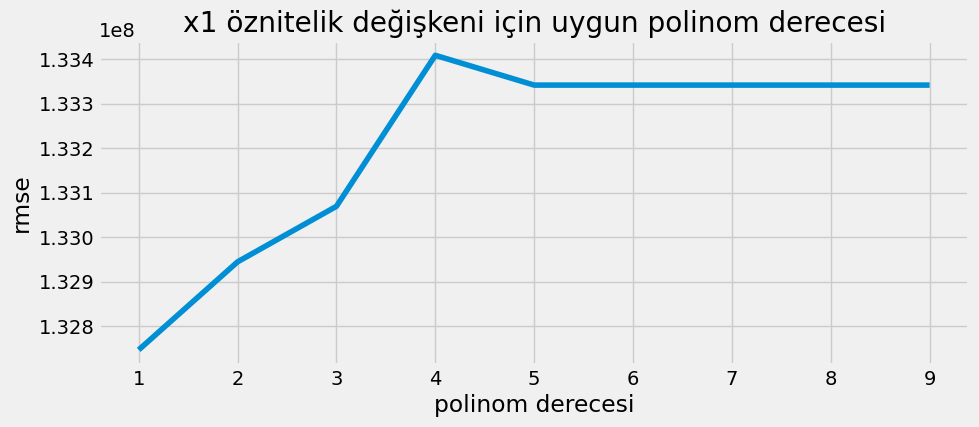

In [62]:
plt.figure(figsize=(10,4))
plt.title('x1 öznitelik değişkeni için uygun polinom derecesi')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('polinom derecesi')
plt.ylabel('rmse')

Text(0, 0.5, 'rmse')

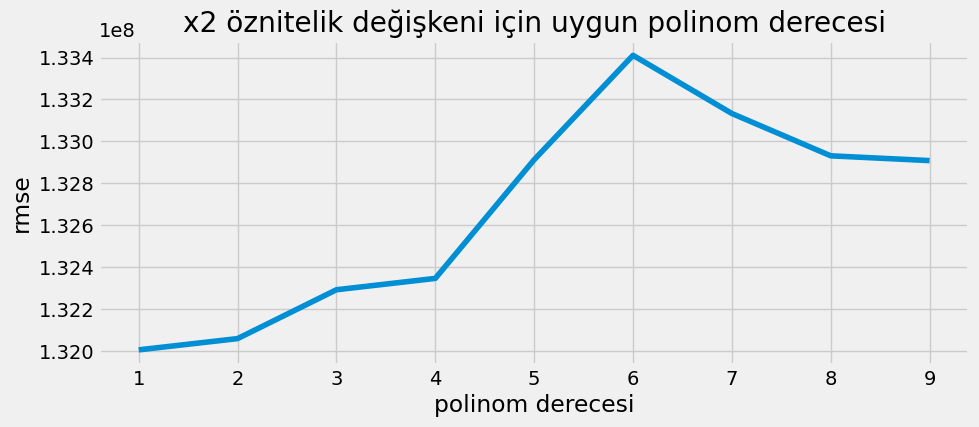

In [63]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, max_deg = 100000000000,0
for deg in degrees:
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_poly_train = poly_features.fit_transform(X2_train)
  poly_reg = LinearRegression()
  poly_reg.fit(X_poly_train, y_train)
  X_poly_test = poly_features.fit_transform(X2_test)
  poly_predict_test = poly_reg.predict(X_poly_test)
  poly_mse = mean_squared_error(y_test, poly_predict_test)
  poly_rmse = np.sqrt(poly_mse)
  rmses.append(poly_mse)
  if poly_rmse < min_rmse:
    min_rmse = poly_rmse
    min_deg = deg
    plt.figure(figsize=(10,4))
plt.title('x2 öznitelik değişkeni için uygun polinom derecesi')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('polinom derecesi')
plt.ylabel('rmse')

Text(0, 0.5, 'rmse')

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

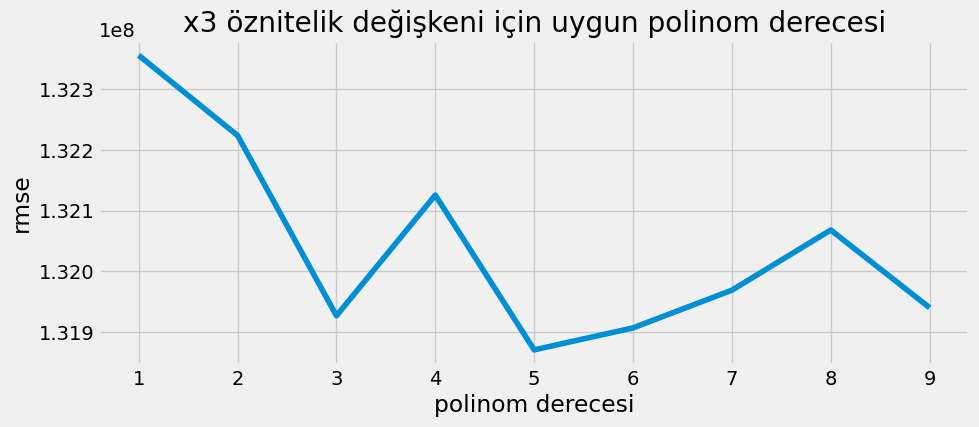

In [64]:

rmses = []
degrees = np.arange(1, 10)
min_rmse, max_deg = 100000000000,0
for deg in degrees:
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_poly_train = poly_features.fit_transform(X3_train)
  poly_reg = LinearRegression()
  poly_reg.fit(X_poly_train, y_train)
  X_poly_test = poly_features.fit_transform(X2_test)
  poly_predict_test = poly_reg.predict(X_poly_test)
  poly_mse = mean_squared_error(y_test, poly_predict_test)
  poly_rmse = np.sqrt(poly_mse)
  rmses.append(poly_mse)
  if poly_rmse < min_rmse:
    min_rmse = poly_rmse
    min_deg = deg
    plt.figure(figsize=(10,4))
plt.title('x3 öznitelik değişkeni için uygun polinom derecesi')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('polinom derecesi')
plt.ylabel('rmse')

Text(0, 0.5, 'rmse')

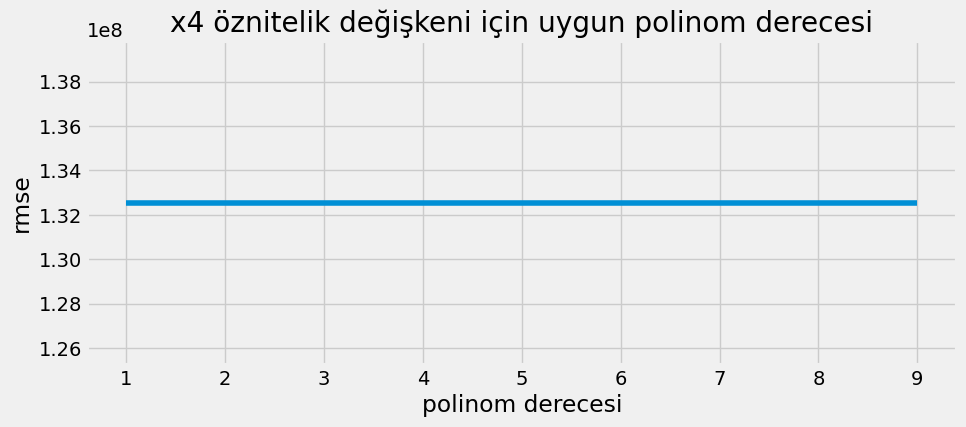

In [65]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, max_deg = 100000000000,0
for deg in degrees:
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_poly_train = poly_features.fit_transform(X4_train)
  poly_reg = LinearRegression()
  poly_reg.fit(X_poly_train, y_train)
  X_poly_test = poly_features.fit_transform(X4_test)
  poly_predict_test = poly_reg.predict(X_poly_test)
  poly_mse = mean_squared_error(y_test, poly_predict_test)
  poly_rmse = np.sqrt(poly_mse)
  rmses.append(poly_mse)
  if poly_rmse < min_rmse:
    min_rmse = poly_rmse
    min_deg = deg
    plt.figure(figsize=(10,4))
plt.title('x4 öznitelik değişkeni için uygun polinom derecesi')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('polinom derecesi')
plt.ylabel('rmse')

Text(0, 0.5, 'rmse')

<Figure size 1000x400 with 0 Axes>

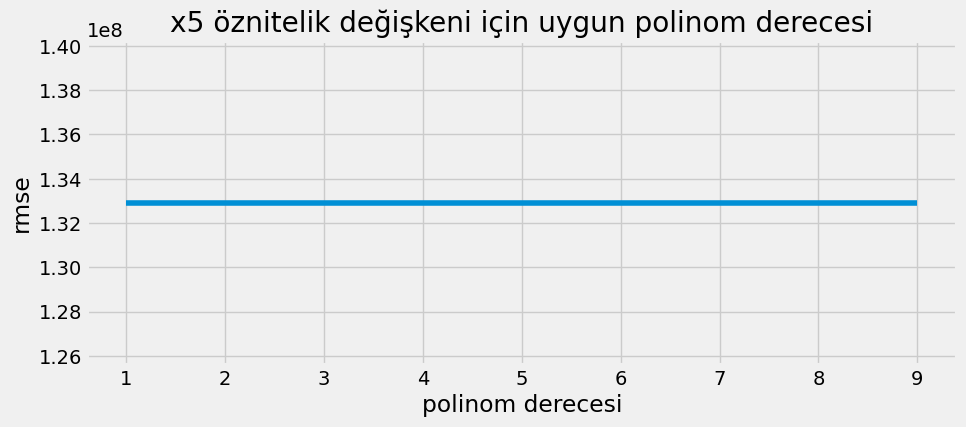

In [66]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, max_deg = 100000000000,0
for deg in degrees:
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_poly_train = poly_features.fit_transform(X5_train)
  poly_reg = LinearRegression()
  poly_reg.fit(X_poly_train, y_train)
  X_poly_test = poly_features.fit_transform(X5_test)
  poly_predict_test = poly_reg.predict(X_poly_test)
  poly_mse = mean_squared_error(y_test, poly_predict_test)
  poly_rmse = np.sqrt(poly_mse)
  rmses.append(poly_mse)
  if poly_rmse < min_rmse:
    min_rmse = poly_rmse
    min_deg = deg
    plt.figure(figsize=(10,4))
plt.title('x5 öznitelik değişkeni için uygun polinom derecesi')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('polinom derecesi')
plt.ylabel('rmse')

Text(0, 0.5, 'rmse')

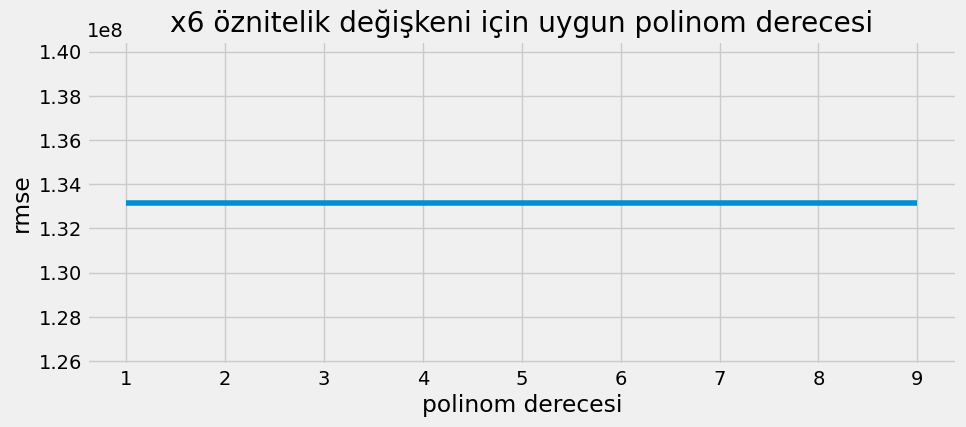

In [67]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, max_deg = 100000000000,0
for deg in degrees:
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_poly_train = poly_features.fit_transform(X6_train)
  poly_reg = LinearRegression()
  poly_reg.fit(X_poly_train, y_train)
  X_poly_test = poly_features.fit_transform(X6_test)
  poly_predict_test = poly_reg.predict(X_poly_test)
  poly_mse = mean_squared_error(y_test, poly_predict_test)
  poly_rmse = np.sqrt(poly_mse)
  rmses.append(poly_mse)
  if poly_rmse < min_rmse:
    min_rmse = poly_rmse
    min_deg = deg
    plt.figure(figsize=(10,4))
plt.title('x6 öznitelik değişkeni için uygun polinom derecesi')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('polinom derecesi')
plt.ylabel('rmse')

Text(0, 0.5, 'rmse')

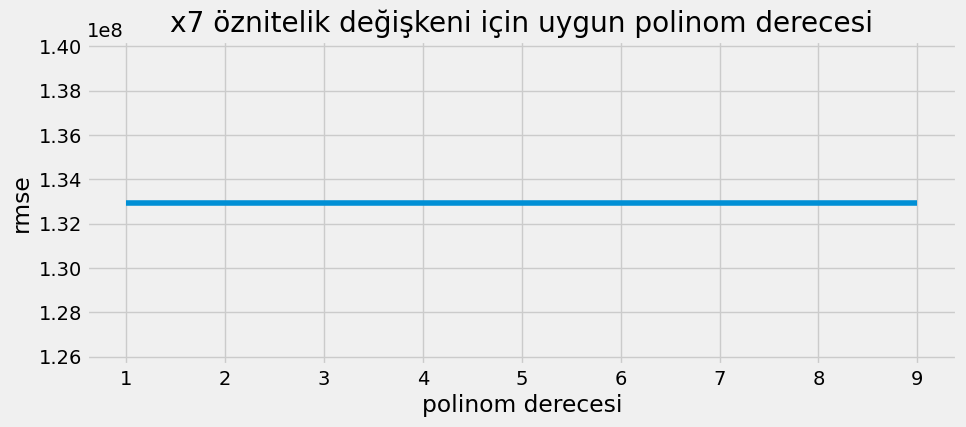

In [68]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, max_deg = 100000000000,0
for deg in degrees:
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_poly_train = poly_features.fit_transform(X7_train)
  poly_reg = LinearRegression()
  poly_reg.fit(X_poly_train, y_train)
  X_poly_test = poly_features.fit_transform(X7_test)
  poly_predict_test = poly_reg.predict(X_poly_test)
  poly_mse = mean_squared_error(y_test, poly_predict_test)
  poly_rmse = np.sqrt(poly_mse)
  rmses.append(poly_mse)
  if poly_rmse < min_rmse:
    min_rmse = poly_rmse
    min_deg = deg
    plt.figure(figsize=(10,4))
plt.title('x7 öznitelik değişkeni için uygun polinom derecesi')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('polinom derecesi')
plt.ylabel('rmse')

Text(0, 0.5, 'rmse')

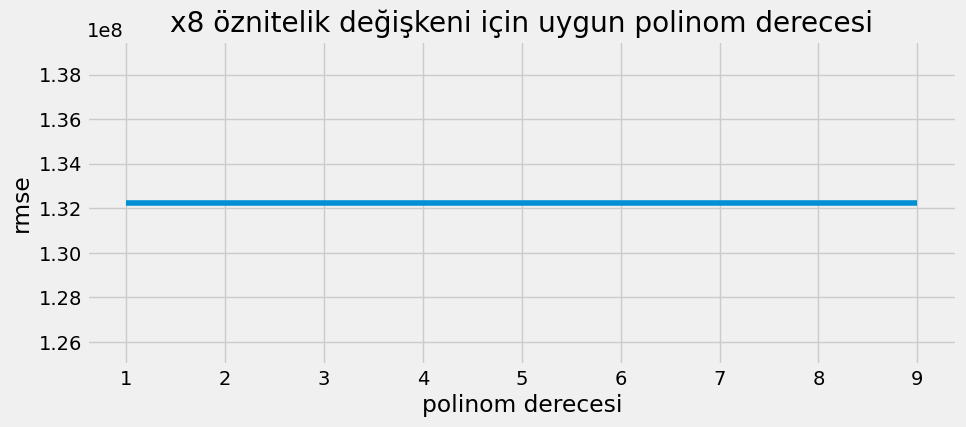

In [69]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, max_deg = 100000000000,0
for deg in degrees:
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_poly_train = poly_features.fit_transform(X8_train)
  poly_reg = LinearRegression()
  poly_reg.fit(X_poly_train, y_train)
  X_poly_test = poly_features.fit_transform(X8_test)
  poly_predict_test = poly_reg.predict(X_poly_test)
  poly_mse = mean_squared_error(y_test, poly_predict_test)
  poly_rmse = np.sqrt(poly_mse)
  rmses.append(poly_mse)
  if poly_rmse < min_rmse:
    min_rmse = poly_rmse
    min_deg = deg
    plt.figure(figsize=(10,4))
plt.title('x8 öznitelik değişkeni için uygun polinom derecesi')
sns.lineplot(x=degrees,y=rmses)
plt.xlabel('polinom derecesi')
plt.ylabel('rmse')

In [70]:
#SGD UYGULAMASI

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor



In [72]:
X_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()

X=X_scaler.fit_transform(X)
y=y_scaler.fit_transform(y.values.reshape(-1,1))

In [73]:
x_train , x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
sgd_reg =SGDRegressor(random_state=42,penalty='elasticnet')


In [75]:
from sklearn.model_selection import GridSearchCV
parametreler = {'alpha':[0.0001,0.001,0.01],
                'eta0': [0.0001,0.001,0.01],
                'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                'learning_rate':['constant','optimal','invscaling','adaptive'],
                'max_iter':[100,200,500,1000]}

sgd_reg_GS = GridSearchCV(estimator=sgd_reg,param_grid=parametreler,cv=5,n_jobs=-1,scoring='r2')
sgd_reg_GS.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=SGDRegressor(penalty='elasticnet', random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.0001, 0.001, 0.01],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'max_iter': [100, 200, 500, 1000]},
             scoring='r2')

In [76]:
print(sgd_reg_GS.best_params_)
print(sgd_reg_GS.best_score_)
print(sgd_reg_GS.best_estimator_)

{'alpha': 0.0001, 'eta0': 0.01, 'l1_ratio': 0, 'learning_rate': 'adaptive', 'max_iter': 100}
0.7324441651002094
SGDRegressor(l1_ratio=0, learning_rate='adaptive', max_iter=100,
             penalty='elasticnet', random_state=42)


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Kategorik değişkenleri dönüştürme
data = pd.get_dummies(data, drop_first=True)

# Hedef değişken ve özelliklerin ayrılması
X = data.drop("charges", axis=1)
y = data["charges"]

# Eğitim ve test veri setine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini oluşturma
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modeli eğitme
rf_model.fit(X_train, y_train)

# Eğitim ve test seti tahminleri
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Performansı değerlendirme
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# RMSE'yi hesaplama
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Eğitim R2 Skoru: {train_r2:.2f}")
print(f"Test R2 Skoru: {test_r2:.2f}")
print(f"Eğitim RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")



Eğitim R2 Skoru: 0.98
Test R2 Skoru: 0.85
Eğitim RMSE: 1897.51
Test RMSE: 4801.74
